In [2]:
# Start rmagic to mix Python and R code sells
%load_ext rpy2.ipython


In [3]:
import pandas as pd

# Read in training data from my Github to trainingDF
# I changed some attributes such as "marital-status" to "maritalstatus"
# because hyphen's are reserved for subtraction in Python
trainingDF  = pd.read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%204/adult_training.csv");

trainingDF

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
1,38,Private,9,Divorced,Handlers-cleaners,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
4,31,Private,14,Never-married,Prof-specialty,Female,14084,0,>50K
...,...,...,...,...,...,...,...,...,...
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K
14793,32,Private,6,Married-civ-spouse,Handlers-cleaners,Male,0,0,<=50K
14794,32,Private,14,Never-married,Tech-support,Male,0,0,<=50K
14795,58,Private,9,Widowed,Adm-clerical,Female,0,0,<=50K


In [4]:
# Contingency table of workclass and sex
crosstab = pd.crosstab(trainingDF.workclass, trainingDF.sex)

print(crosstab)

sex               Female  Male
workclass                     
?                    377   452
Federal-gov          149   305
Local-gov            377   592
Never-worked           1     4
Private             3574  6707
Self-emp-inc          54   444
Self-emp-not-inc     178   992
State-gov            201   385
Without-pay            1     4


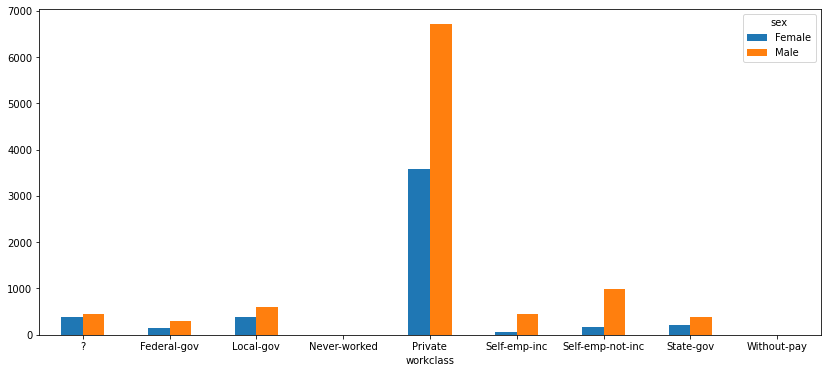

In [5]:
# Barplot for crosstab (workclass and sex)
barplot = crosstab.plot.bar(rot=0, figsize=(14,6))

In [6]:
# Contingency table of sex and marital status
crosstab2 = pd.crosstab(trainingDF.sex, trainingDF.maritalstatus)

print(crosstab2)

maritalstatus  Divorced  Married-AF-spouse  Married-civ-spouse  \
sex                                                              
Female             1219                  7                 761   
Male                795                  4                6010   

maritalstatus  Married-spouse-absent  Never-married  Separated  Widowed  
sex                                                                      
Female                            95           2160        290      380  
Male                             104           2717        182       73  


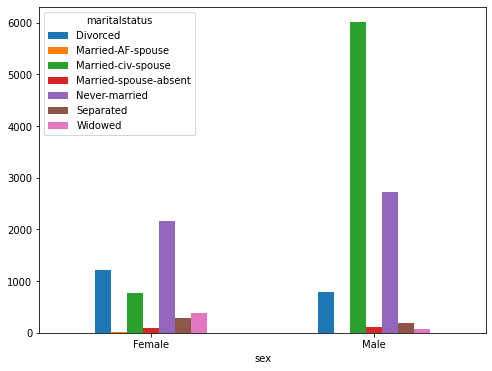

In [7]:
# Barplot for crosstab (sex and marital status)
barplot2 = crosstab2.plot.bar(rot=0, figsize=(8,6))

In [9]:
# Create adultOver40DF
adultOver40DF = trainingDF.loc[(trainingDF['age'] > 40)]

adultOver40DF



,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,income
0,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K
2,49,Private,5,Married-spouse-absent,Other-service,Female,0,0,<=50K
3,52,Self-emp-not-inc,9,Married-civ-spouse,Exec-managerial,Male,0,0,>50K
7,43,Private,7,Married-civ-spouse,Transport-moving,Male,0,2042,<=50K
8,54,?,10,Married-civ-spouse,?,Male,0,0,>50K
...,...,...,...,...,...,...,...,...,...
14787,45,Local-gov,12,Divorced,Prof-specialty,Female,0,0,<=50K
14790,65,Self-emp-not-inc,15,Never-married,Prof-specialty,Male,1086,0,<=50K
14791,43,State-gov,10,Divorced,Adm-clerical,Female,0,0,<=50K
14792,43,Self-emp-not-inc,10,Married-civ-spouse,Craft-repair,Male,0,0,<=50K


In [11]:
# Contingency table of sex and marital status for adultOver40DF
crosstab3 = pd.crosstab(adultOver40DF.sex, adultOver40DF.maritalstatus)

print(crosstab3)

maritalstatus  Divorced  Married-civ-spouse  Married-spouse-absent  \
sex                                                                  
Female              720                 305                     38   
Male                448                3383                     47   

maritalstatus  Never-married  Separated  Widowed  
sex                                               
Female                   256        133      354  
Male                     315         74       71  


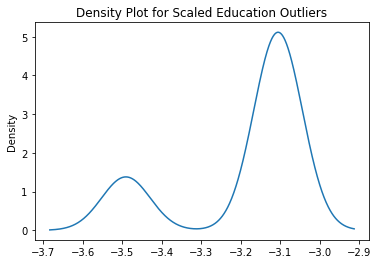

In [89]:
# Determining outliers for education field
from scipy import stats
import matplotlib.pyplot as plt

# Create scaled_education
trainingDF['scaled_education'] = stats.zscore(trainingDF.education, nan_policy='omit')

# Three sigma rule (to find outliers)
trainingOutliers = trainingDF.query('(scaled_education > 3 | scaled_education < -3)')['scaled_education']

trainingOutliers.plot.density()
plt.title('Density Plot for Scaled Education Outliers')
plt.show()

# I concluded that yes, there are outliers which exist for the education field

In [98]:
# Create scaled_age
trainingDF['scaled_age'] = stats.zscore(trainingDF.age, nan_policy='omit')

# Three sigma rule (to find outliers)
ageOutliers = trainingDF.query('(scaled_age > 3 | scaled_age < -3)')['scaled_age']

ageOutliers.size
# There are 60 outliers for age


60

In [99]:
ageOutliers.sort_values()
# By sorting, I determined that the most extreme outlier was 3.75

8346     3.020275
4643     3.020275
4008     3.020275
7724     3.020275
6450     3.020275
2430     3.020275
8477     3.020275
11604    3.020275
14455    3.020275
204      3.020275
13455    3.093383
9561     3.093383
7651     3.093383
9857     3.093383
11234    3.093383
9369     3.166491
11108    3.166491
8773     3.166491
14766    3.166491
10282    3.166491
3891     3.166491
14471    3.166491
1485     3.166491
3453     3.239598
8768     3.239598
5961     3.312706
12656    3.312706
7147     3.312706
5154     3.312706
10470    3.312706
3868     3.385814
9397     3.385814
14746    3.385814
10991    3.458922
14281    3.532030
552      3.605138
10468    3.605138
14091    3.751354
12948    3.751354
14660    3.751354
11091    3.751354
11562    3.751354
99       3.751354
8921     3.751354
492      3.751354
885      3.751354
1066     3.751354
2420     3.751354
2467     3.751354
2877     3.751354
10158    3.751354
4114     3.751354
5481     3.751354
5936     3.751354
6476     3.751354
7254     3

In [100]:
# Create adultOver80DF
adultOver80DF = trainingDF.loc[(trainingDF['age'] >= 80)]

adultOver80DF

,age,workclass,education,maritalstatus,occupation,sex,capitalgain,capitalloss,income,scaled_education,scaled_age
99,90,Private,9,Never-married,Other-service,Male,0,2206,<=50K,-0.411359,3.751354
204,80,?,9,Widowed,?,Male,0,0,<=50K,-0.411359,3.020275
492,90,Private,9,Never-married,Other-service,Female,0,0,<=50K,-0.411359,3.751354
552,88,Self-emp-not-inc,15,Married-civ-spouse,Prof-specialty,Male,0,0,<=50K,1.897924,3.605138
885,90,Private,13,Married-civ-spouse,Exec-managerial,Male,0,0,<=50K,1.128163,3.751354
1066,90,Private,10,Never-married,Other-service,Male,0,0,<=50K,-0.026479,3.751354
1485,82,?,4,Widowed,?,Male,0,0,<=50K,-2.335762,3.166491
2420,90,Private,5,Never-married,Adm-clerical,Female,0,0,<=50K,-1.950881,3.751354
2430,80,Private,14,Widowed,Prof-specialty,Female,0,0,<=50K,1.513043,3.020275
2467,90,Local-gov,14,Married-civ-spouse,Exec-managerial,Male,20051,0,>50K,1.513043,3.751354


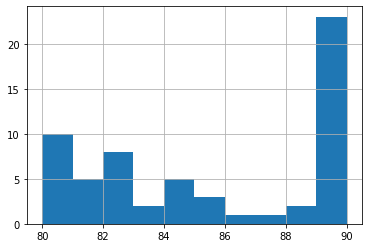

In [101]:
# Create histogram of age for adults over 80
adultOver80DF.age.hist()

# I was able to conclude that the most common age over 80 was 89
# The least common were tied between 86 and 87.

In [52]:
# Load R, then read in the dataframe
%%R

library(readr)
trainingDF <- read_csv("https://raw.githubusercontent.com/mattcar265/IDS/main/Project%204/adult_training.csv", show_col_types = FALSE)

summary(trainingDF)

      age         workclass           education     maritalstatus     
 Min.   :17.00   Length:14797       Min.   : 1.00   Length:14797      
 1st Qu.:28.00   Class :character   1st Qu.: 9.00   Class :character  
 Median :37.00   Mode  :character   Median :10.00   Mode  :character  
 Mean   :38.69                      Mean   :10.07                     
 3rd Qu.:48.00                      3rd Qu.:12.00                     
 Max.   :90.00                      Max.   :16.00                     
  occupation            sex             capitalgain     capitalloss     
 Length:14797       Length:14797       Min.   :    0   Min.   :   0.00  
 Class :character   Class :character   1st Qu.:    0   1st Qu.:   0.00  
 Mode  :character   Mode  :character   Median :    0   Median :   0.00  
                                       Mean   : 1067   Mean   :  88.58  
                                       3rd Qu.:    0   3rd Qu.:   0.00  
                                       Max.   :99999   Max.   :43

In [120]:
# Contingency table for workclass and sex
%%R

contTable <- prop.table(table(trainingDF$workclass, trainingDF$sex), margin=2)

contTable

                  
                         Female         Male
  ?                0.0767508143 0.0457258472
  Federal-gov      0.0303338762 0.0308548306
  Local-gov        0.0767508143 0.0598887203
  Never-worked     0.0002035831 0.0004046535
  Private          0.7276058632 0.6785027820
  Self-emp-inc     0.0109934853 0.0449165402
  Self-emp-not-inc 0.0362377850 0.1003540718
  State-gov        0.0409201954 0.0389479009
  Without-pay      0.0002035831 0.0004046535


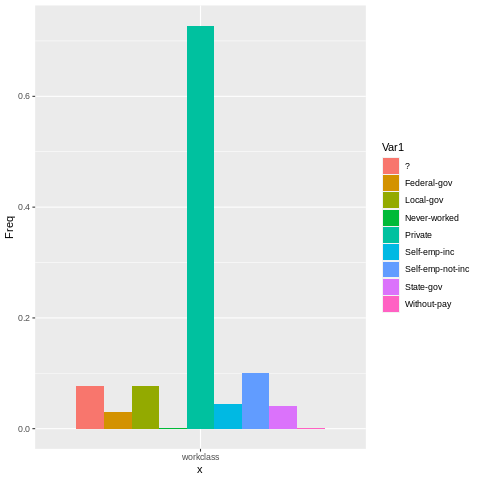

In [118]:
# Plot of workclass and sex
%%R

library("ggplot2")
ggplot(as.data.frame(contTable), aes(x = 'workclass', y = Freq, fill = Var1)) +


geom_bar(stat="identity", position = "dodge")

# From this chart, I concluded that private workclass was by far the most common

In [130]:
# Contingency table for sex and marital status
%%R

contTable2 <- prop.table(table(trainingDF$maritalstatus, trainingDF$sex), margin=2)

contTable2

                       
                              Female         Male
  Divorced              0.2481677524 0.0804248862
  Married-AF-spouse     0.0014250814 0.0004046535
  Married-civ-spouse    0.1549267101 0.6079919069
  Married-spouse-absent 0.0193403909 0.0105209914
  Never-married         0.4397394137 0.2748609004
  Separated             0.0590390879 0.0184117350
  Widowed               0.0773615635 0.0073849267


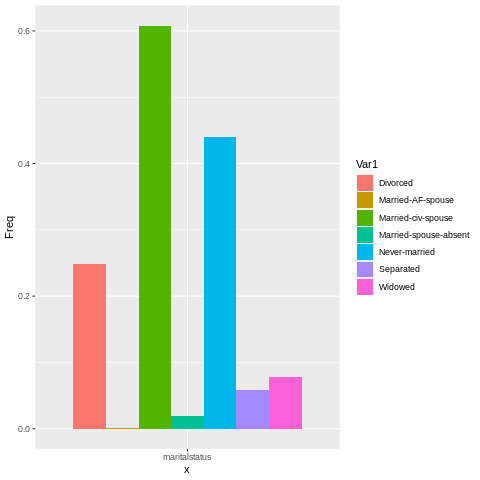

In [134]:
# Plot of sex and maritalstatus
%%R

library("ggplot2")
ggplot(as.data.frame(contTable2), aes(x = 'maritalstatus', y = Freq, fill = Var1)) +
geom_bar(stat="identity", position = "dodge")


In [135]:
# Create $scaled_education to find outliers
%%R

trainingDF$scaled_education <- scale(x = trainingDF$education)

# Print to check that the mean is 0
summary(trainingDF$scaled_education)

       V1          
 Min.   :-3.49029  
 1st Qu.:-0.41135  
 Median :-0.02648  
 Mean   : 0.00000  
 3rd Qu.: 0.74326  
 Max.   : 2.28273  


In [136]:
# Determine the three sigma rule for the scaled_education attribute
%%R

three_sigma_rule <- (trainingDF$scaled_education < -3 |
                     trainingDF$scaled_education > 3)

# Count the outliers
cat("Total outliers for education:", sum(three_sigma_rule))

# Display the outliers
cat("\n\nA list of these outliers: \n")
trainingDF$scaled_education[which(three_sigma_rule)]

Total outliers for education: 113

A list of these outliers: 
  [1] -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
  [8] -3.105418 -3.105418 -3.105418 -3.490285 -3.490285 -3.105418 -3.490285
 [15] -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [22] -3.105418 -3.490285 -3.490285 -3.105418 -3.105418 -3.490285 -3.490285
 [29] -3.490285 -3.105418 -3.105418 -3.490285 -3.105418 -3.105418 -3.105418
 [36] -3.490285 -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418
 [43] -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [50] -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [57] -3.105418 -3.105418 -3.490285 -3.105418 -3.105418 -3.105418 -3.105418
 [64] -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418 -3.105418
 [71] -3.490285 -3.105418 -3.490285 -3.490285 -3.490285 -3.105418 -3.490285
 [78] -3.105418 -3.490285 -3.490285 -3.490285 -3.105418 -3.490285 -3.105418
 [85] -3.105418 -3.105418 

In [137]:
# Create $scaled_age (standardized age variable)
%%R

trainingDF$scaled_age <- scale(x = trainingDF$age)

# Print to check that the mean is 0
summary(trainingDF$scaled_age)

       V1         
 Min.   :-1.5855  
 1st Qu.:-0.7813  
 Median :-0.1234  
 Mean   : 0.0000  
 3rd Qu.: 0.6808  
 Max.   : 3.7512  


In [138]:
# Determine the three sigma rule for the scaled_age attribute
%%R

three_sigma_rule <- (trainingDF$scaled_age < -3 |
                     trainingDF$scaled_age > 3)

# Count the outliers
cat("Total outliers for age:", sum(three_sigma_rule))

# Display the outliers
cat("\n\nA list of these outliers: \n")
trainingDF$scaled_age[which(three_sigma_rule)]

# After doing a quick scan of these outliers, I found that 3.751227 was the
# most extreme outlier, and also occurred a lot in the list of outliers. 

Total outliers for age: 60

A list of these outliers: 
 [1] 3.751227 3.020173 3.751227 3.605016 3.751227 3.751227 3.166384 3.751227
 [9] 3.020173 3.751227 3.751227 3.239489 3.385700 3.166384 3.020173 3.751227
[17] 3.020173 3.751227 3.312594 3.751227 3.751227 3.312594 3.020173 3.751227
[25] 3.312594 3.751227 3.093278 3.020173 3.020173 3.751227 3.020173 3.751227
[33] 3.239489 3.166384 3.751227 3.751227 3.166384 3.385700 3.093278 3.093278
[41] 3.751227 3.166384 3.605016 3.312594 3.458805 3.751227 3.166384 3.093278
[49] 3.751227 3.020173 3.312594 3.751227 3.093278 3.751227 3.531911 3.020173
[57] 3.166384 3.751227 3.385700 3.166384


In [139]:
# Create adultOver80DF
%%R

adultOver80DF <- subset(trainingDF, age >= 80)

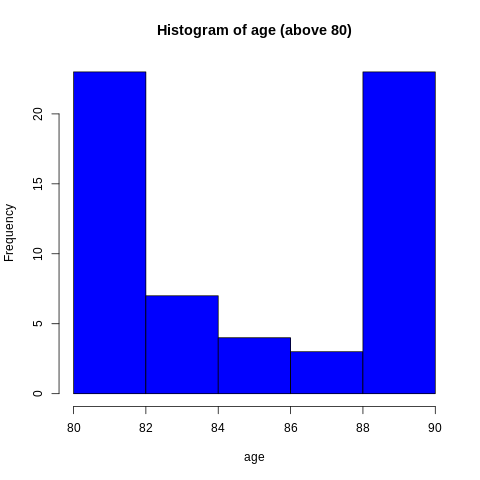

In [140]:
# Create histogram of age
%%R

# Import ggplot
library("ggplot2")

hist(adultOver80DF$age, xlab = "age",
     main = "Histogram of age (above 80)", col="blue")

# The most common age above 80 was in the range of 88-90,
# and the least common was in the range of 80-82